<a href="https://colab.research.google.com/github/valeriamedina2/Regresi-n-Lineal/blob/main/6_2_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **EUA_California**

In [ ]:
EUA = pd.read_csv('California_clean.csv')

In [ ]:
corr = []
det = []
Ta_V = []

## **Private room**

In [ ]:
PR_EUA = EUA.loc[EUA['room_type'] == "Private room"]
PR_EUA

,Unnamed: 0.1,Unnamed: 0,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,bathrooms_text,bedrooms.1,amenities,calendar_updated.1,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,2,2,1.0,0.73,13,37.765550,-122.452130,1,0,1,...,4 shared baths,1,"[""Security cameras on property"", ""Host greets ...",--,t,06/03/23,08/09/14,27/10/22,0,f
4,4,4,1.0,0.90,2,37.760300,-122.421970,3,0,1,...,1 private bath,1,"[""Paid parking garage off premises"", ""Luggage ...",--,t,06/03/23,01/08/09,25/02/23,STR-0000028,f
6,6,6,1.0,0.67,1,37.747660,-122.420410,2,0,1,...,1 bath,1,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",--,t,06/03/23,22/04/14,26/11/22,0,f
7,7,7,1.0,1.00,2,37.717500,-122.396980,2,0,1,...,1.5 shared baths,1,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",--,t,06/03/23,21/02/10,28/01/23,2022-011003STR,f
11,11,11,1.0,1.00,9,37.792330,-122.424310,1,0,1,...,--,1,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",--,t,06/03/23,10/07/11,28/02/23,0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,6927,6927,1.0,0.98,32,37.788619,-122.422556,2,0,1,...,1 private bath,1,"[""Security cameras on property"", ""Self check-i...",--,t,06/03/23,13/02/23,13/02/23,Exempt,f
6929,6929,6929,1.0,0.97,67,37.725231,-122.404776,2,0,1,...,1 shared bath,1,"[""Oven"", ""Security cameras on property"", ""Self...",--,t,06/03/23,--,--,0,f
6930,6930,6930,1.0,1.00,6,37.753771,-122.399004,1,0,1,...,1 shared bath,1,"[""Carbon monoxide alarm"", ""Security cameras on...",--,t,06/03/23,--,--,0,t
6933,6933,6933,0.0,0.00,1,37.777633,-122.416478,1,0,1,...,1 shared bath,1,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",--,t,06/03/23,--,--,0,f


### **host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

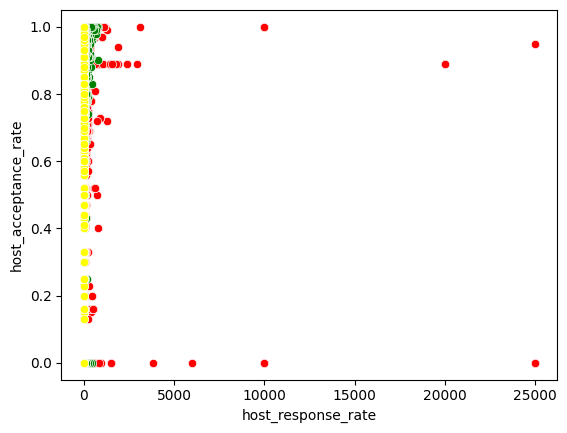

In [ ]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=PR_EUA)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=PR_EUA)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=PR_EUA)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=PR_EUA)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['host_response_rate', 'price', 'number_of_reviews' , 'review_scores_rating']]
Var_Dep= PR_EUA['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([6.96788331e-01, 5.96671200e-06, 2.08102678e-04, 2.18353191e-02]),
 'rank_': 4,
 'singular_': array([9.72530735e+04, 4.94913041e+03, 8.73003149e+01, 1.78219200e+01]),
 'intercept_': 0.1281332697860883}

**Modelo matemático: y= 6.96788331e-01x1 + 5.96671200e-06x2 + 2.08102678e-04x3 + 2.18353191e-02x4 + 0.1281332697860883**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter1

0.6143558902068154

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.7838085800798658

In [ ]:
det.append(coef_Deter1)
corr.append(np.sqrt(coef_Correl1))
Ta_V.append("Private room / host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating")

### **Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

<Axes: xlabel='availability_365', ylabel='price'>

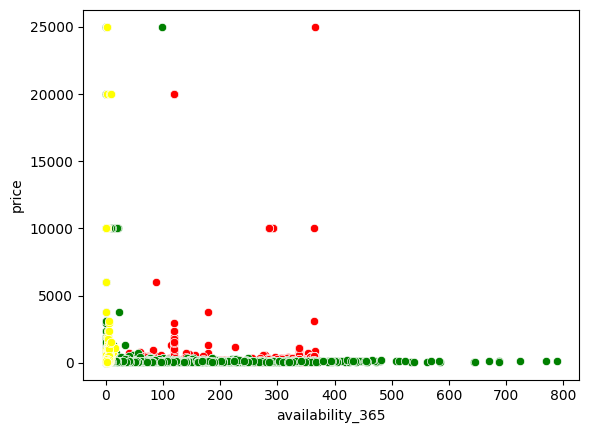

In [ ]:
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="red", data=PR_EUA)
sns.scatterplot(x='host_response_rate', y='price', color="blue", data=PR_EUA)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=PR_EUA)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=PR_EUA)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['availability_365', 'host_response_rate', 'number_of_reviews', 'accommodates']]
Var_Dep= PR_EUA['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([   0.37449276, -284.6573589 ,   -1.34962041,  213.12536151]),
 'rank_': 4,
 'singular_': array([6569.11214239, 4963.9114323 ,   64.64482961,   18.03531766]),
 'intercept_': 186.80212874366015}

**Modelo matemático: y= 0.37449276x1 + -284.6573589x2 + -1.34962041x3 + 213.12536151x4 + 186.80212874366015**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter2

0.027626156491513565

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.16621118040466942

In [ ]:
det.append(coef_Deter2)
corr.append(np.sqrt(coef_Correl2))
Ta_V.append("Private room / Price vs availability_365, host_response_rate, number_of_reviews, accommodates")

### **host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

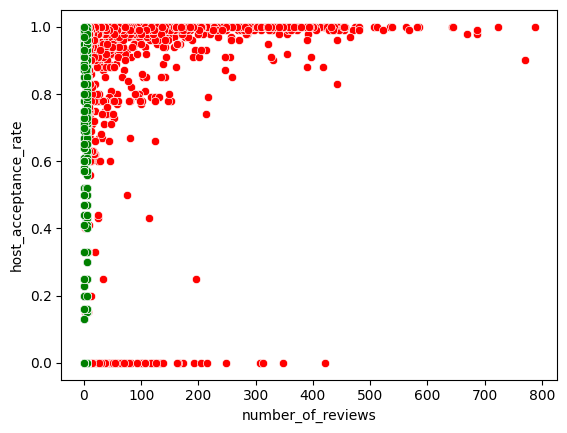

In [ ]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=PR_EUA)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=PR_EUA)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=PR_EUA)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= PR_EUA[['number_of_reviews','review_scores_cleanliness','review_scores_communication']]
Var_Dep= PR_EUA['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00048369, 0.03010285, 0.02614852]),
 'rank_': 3,
 'singular_': array([4964.06839799,  124.82742293,   12.00308149]),
 'intercept_': 0.5297666312104297}

**Modelo matemático: y= 0.00048369x1 + 0.03010285x2 + 0.02614852x3 + 0.5297666312104297**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter3

0.1259492998514291

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.3548933640566263

In [ ]:
det.append(coef_Deter3)
corr.append(np.sqrt(coef_Correl3))
Ta_V.append("Private room / host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication")

## **Hotel room**

In [ ]:
HR_EUA = EUA.loc[EUA['room_type'] == "Hotel room"]
HR_EUA

,Unnamed: 0.1,Unnamed: 0,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,bathrooms_text,bedrooms.1,amenities,calendar_updated.1,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
711,711,711,0.99,1.00,16,37.799200,-122.423580,2,0,1,...,1 private bath,1,"[""Essentials"", ""Carbon monoxide alarm"", ""Build...",--,t,06/03/23,22/11/14,19/02/23,FY 2017-18,t
787,787,787,0.99,1.00,16,37.796960,-122.425390,4,0,1,...,1 private bath,1,"[""Security cameras on property"", ""Self check-i...",--,t,06/03/23,25/05/15,11/12/22,FY 2017-18,t
938,938,938,1.00,0.92,5,37.787290,-122.409280,4,0,1,...,1 private bath,1,"[""Self check-in"", ""Shampoo"", ""Air conditioning...",--,t,06/03/23,05/09/15,01/08/21,License not needed per OSTR,f
1704,1704,1704,0.99,1.00,14,37.777220,-122.415600,1,0,1,...,4 shared baths,1,"[""Paid parking garage off premises"", ""Security...",--,t,06/03/23,10/02/17,20/02/23,Exempt,f
2229,2229,2229,0.80,1.00,61,37.786690,-122.408820,2,0,0,...,1 private bath,0,"[""Security cameras on property"", ""Shampoo"", ""T...",--,t,06/03/23,22/05/19,04/09/22,1083521,t
2230,2230,2230,0.80,1.00,61,37.787450,-122.407140,2,0,0,...,1 private bath,0,"[""Paid parking garage off premises"", ""Security...",--,t,06/03/23,10/05/19,16/02/20,1083521,t
2246,2246,2246,0.80,1.00,61,37.785960,-122.408560,2,0,0,...,1 private bath,0,"[""Security cameras on property"", ""Shampoo"", ""T...",--,t,06/03/23,15/03/18,13/11/22,1083521,t
2247,2247,2247,0.80,1.00,61,37.785940,-122.407040,2,0,0,...,1 private bath,0,"[""Security cameras on property"", ""Shampoo"", ""T...",--,t,06/03/23,15/04/18,15/09/22,1083521,t
2248,2248,2248,0.80,1.00,61,37.787520,-122.407120,2,0,0,...,1 private bath,0,"[""Paid parking garage off premises"", ""Security...",--,t,06/03/23,16/03/18,29/02/20,1083521,t
2252,2252,2252,0.80,1.00,61,37.787970,-122.409070,2,0,0,...,1 private bath,0,"[""Paid parking garage off premises"", ""Security...",--,t,06/03/23,24/03/18,25/02/20,1083521,t


### **host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

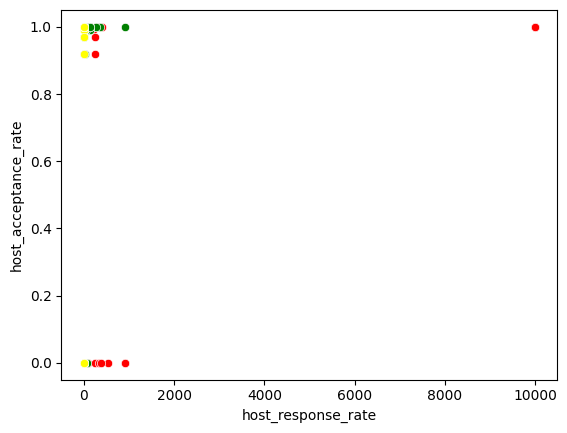

In [ ]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=HR_EUA)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=HR_EUA)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=HR_EUA)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="yellow", data=HR_EUA)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['host_response_rate', 'price', 'number_of_reviews' , 'review_scores_rating']]
Var_Dep= HR_EUA['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.02598526e+00,  1.48375328e-05, -9.60439676e-05,  3.99204796e-03]),
 'rank_': 4,
 'singular_': array([1.88883081e+04, 9.71035844e+02, 9.17929635e+00, 2.04435614e+00]),
 'intercept_': 0.013021059462987483}

**Modelo matemático: y= 1.02598526e+00x1 + 1.48375328e-05x2 + -9.60439676e-05x3 + 3.99204796e-03x4 + 0.013021059462987483**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter4

0.9644921083497338

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.9820855911526927

In [ ]:
det.append(coef_Deter4)
corr.append(np.sqrt(coef_Correl4))
Ta_V.append("Hotel room / host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating")

### **Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

<Axes: xlabel='availability_365', ylabel='price'>

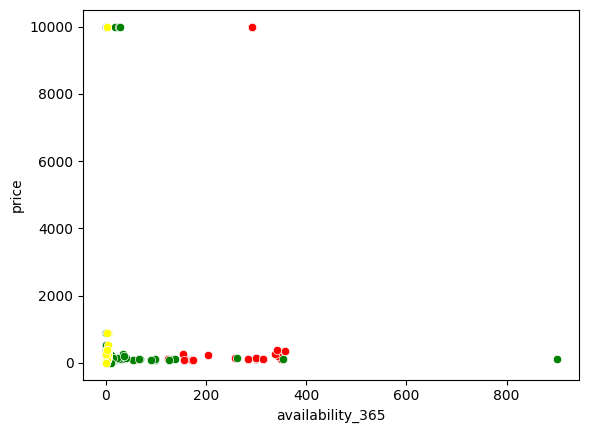

In [ ]:
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="red", data=HR_EUA)
sns.scatterplot(x='host_response_rate', y='price', color="blue", data=HR_EUA)
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=HR_EUA)
sns.scatterplot(x='accommodates', y='price', color="yellow", data=HR_EUA)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['availability_365', 'host_response_rate', 'number_of_reviews', 'accommodates']]
Var_Dep= HR_EUA['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([    6.425581  , -1288.6006835 ,    -1.74354179,   -77.79322666]),
 'rank_': 4,
 'singular_': array([1029.04286195,  925.0313743 ,    6.97906391,    2.03820805]),
 'intercept_': 1081.957337719889}

**Modelo matemático: y= 6.425581x1 + -1288.6006835x2 + -1.74354179x3 + -77.79322666x4 + 1081.957337719889**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter5

0.08977896074021141

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.29963137475940566

In [ ]:
det.append(coef_Deter5)
corr.append(np.sqrt(coef_Correl5))
Ta_V.append("Hotel room / Price vs availability_365, host_response_rate, number_of_reviews, accommodates")

### **host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

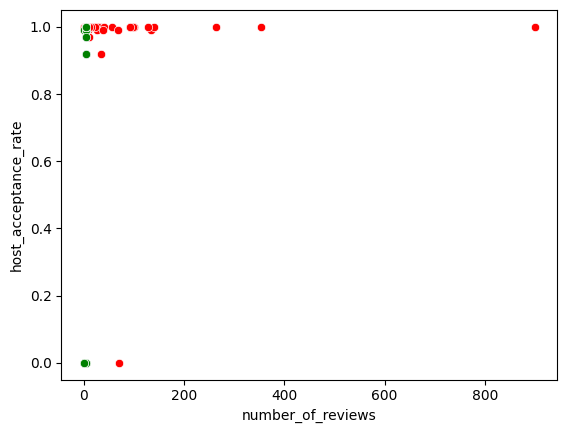

In [ ]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=HR_EUA)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=HR_EUA)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=HR_EUA)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= HR_EUA[['number_of_reviews','review_scores_cleanliness','review_scores_communication']]
Var_Dep= HR_EUA['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00034382,  0.20865163, -0.01950043]),
 'rank_': 3,
 'singular_': array([975.14357468,  13.10615826,   3.0342076 ]),
 'intercept_': -0.006857460799376103}

**Modelo matemático: y= 0.00034382x1 + 0.20865163x2 + -0.01950043x3 + -0.006857460799376103**

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter6

0.4445817935305686

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.6667696705239138

In [ ]:
det.append(coef_Deter6)
corr.append(np.sqrt(coef_Correl6))
Ta_V.append("Hotel room / host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication")

## **Tabla**

In [ ]:
tabla = pd.DataFrame()
tabla['Tipo de habitación y Variables'] = Ta_V
tabla['Coef. Determinación'] = det
tabla['Coef. Correlación'] = corr
tabla

,Tipo de habitación y Variables,Coef. Determinación,Coef. Correlación
0,Private room / host_acceptance_rate vs host_re...,0.614356,0.885330
1,Private room / host_acceptance_rate vs host_re...,0.614356,0.885330
2,"Private room / Price vs availability_365, host...",0.027626,0.407690
3,Hotel room / host_acceptance_rate vs host_resp...,0.964492,0.991002
4,"Hotel room / Price vs availability_365, host_r...",0.089779,0.547386
5,Hotel room / host_acceptance_rate vs number_of...,0.444582,0.816560
